### Fill in your name, student id number and email address
#### name: Ruslan Hasanov
#### student id: 1.2.246.562.24.87458088684
#### email: ruhasa@utu.fi

## Data analysis and knowledge discovery - Exercise 3: Unsupervised learning

This is the template for the third exercise. The purpose of this exercise is to familiarize yourself with the basics of unsupervised learning by using the agglomerative hierarchical clustering and k-means clustering algorithms to find patterns.

This exercise uses the wine dataset, available on moodle as `ex3_wine.csv`. The features are all numeric. They quantify chemical properties of wine, grown around the same area in Italy. The feature names are listed in the table below.

| Feature | Type 
| :--- | ---: 
| Alcohol | Numeric (float)
| Malic acid | Numeric (float)
| Ash | Numeric (float)
| Alcalinity of ash | Numeric (float)
| Magnesium | Numeric (integer)
| Total phenols | Numeric (float)
| Flavanoids | Numeric (float)
| Nonflavanoid phenols | Numeric (float)
| Proanthocyanins | Numeric (float)
| Color intensity | Numeric (float)
| Hue | Numeric (float)
| OD280/OD315 of diluted wines | Numeric (float)
| Proline | Numeric (integer)


In real applications, visualizing various aspects of the data the data and data scrubbing are important steps. However, in this exercise you can treat the data as given, and focus on the unsupervised methods.

Please consider the following things when returning your notebook:

 - As in the two previous exercises, the grading scale is failed/passed/passed with honors.
 - **For a passing grade, Parts 1-3 must be complete**, and all questions in each of them should be answered. Some mistakes are allowed as long as you clearly attempt to solve all the exercises.
 - For completing Parts 1-3 and the optional bonus Part 4 sufficiently well, you will be awarded one bonus point for the exam.
 - All the cells in the finished notebook should run without crashing. Please delete unnecessary cells. As a good rule of thumb, use **"Restart Kernel and Run All Cells"** on your finished notebook to make sure it runs without errors and produces the expected output.
 - Comment your code to explain how it works and what you intend for it to do.
 - Answer the questions asked in the assignments in Markdown cells.
 - If you're having trouble with this exercise, try an online search first, but **don't just copy-paste code you find**. See exercise guidelines in the Moodle page of this course. If you can't find a solution to your problem, **ask for advice at the exercise sessions** or in the course discussion forum on Moodle or email oskari.s.heikkinen@utu.fi.
 - If/when you look things up during this exercise, please **cite your sources**, e.g. a link to a web page. It's better to cite too much than too little.
 - **We don't encourage using a large language model (LLM) such as ChatGPT while doing these exercises.** However, if you do use an LLM, be critical of its output. Understand any code the LLM produced before using the code, don't just copy-paste it. If you used one, write a short description of how you used the LLM in the context of these exercises (what was your input, how did you benefit from the output?)

### Library imports, Jupyter Notebook settings etc.

The below libraries are sufficient to complete the exercise. You can import additional modules here if you want.

In [1]:
import itertools # has some utilities that may be useful in the exercise

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
import scipy.stats as stats


# IPython magic command to display matplotlib figures together with the output
# (Often the default setting in a Jupyter Notebook context, so your figures probably work fine without it)
%matplotlib inline

### Part 0: Read the data

- Download the exercise 3 data on the Moodle page of this course. (`ex3_wine.csv`)
- Read the data into a Pandas dataframe.
- Display a few rows and some basic information to make sure the data was loaded correctly

In [2]:
# Reading the data
wine_data=pd.read_csv(r'C:\Users\Comp-servis\Desktop\ex III\ex3_wine.csv')

# Printing the first rows of dataframe
print('The first rows of the dataframe \n', wine_data.head())

# Printing the basic information 
print('\nBasic information about the data \n')
print( wine_data.info())

The first rows of the dataframe 
    Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050 

### Part 1: Preprocess and visualize the data

 - Perform z-score standardization on the features to ensure that all features have the same scale.
 - Project the data to two dimensions by using principal component analysis (PCA) and visualize the resulting two-dimensional data in a scatter plot. Don't color the scatter plot yet.
 - Does it look like there are clear clusters? Don't worry if they're hard to see. There may be more than one "correct" answer.
 - Draw shapes (for example `matplotlib.patches.Ellipse`) on top of the scatter plot to visualize any clusters you feel you can easily detect.

      Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1    0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2    0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3    1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4    0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   
..        ...         ...       ...           ...        ...            ...   
173  0.876275    2.974543  0.305159      0.301803  -0.332922      -0.985614   
174  0.493343    1.412609  0.414820      1.052516   0.158572      -0.793334   
175  0.332758    1.744744 -0.389355      0.151661   1.422412      -1.129824   
176  0.209232    0.227694  0.012732      0.151661   1.422412      -1.033684   
177  1.395086    1.583165  1.365208      1.502943  -0.262708      -0.392751   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyan

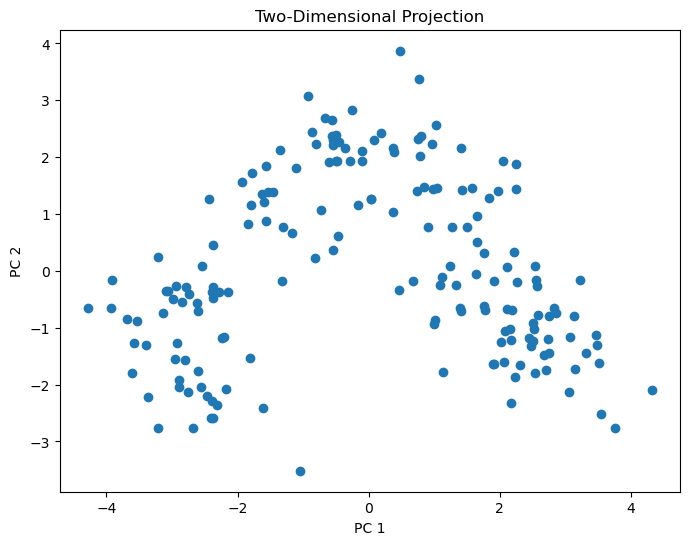

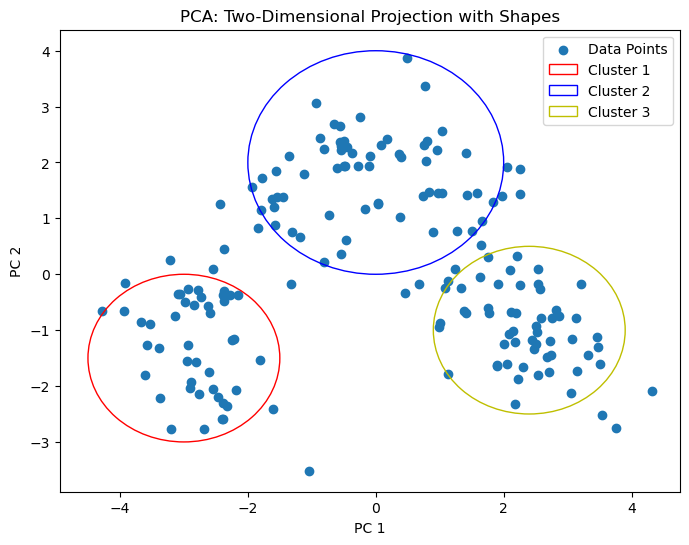

In [3]:
# Printing the z-scores for the wine_data dataframe
print(stats.zscore(wine_data))

# Preparing the scaler
scale= StandardScaler()

# Standardizing the data
scaled_wine_data = scale.fit_transform(wine_data) 

# Projecting the data to two dimensions by using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_wine_data)

# Creating a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Visualizing the resulting two-dimensional data in a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('Two-Dimensional Projection')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

# Creating the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], label='Data Points')

# Drawing shapes on top of the previous scatter plot to visualize clusters
ellipse1 = Ellipse((-3,-1.5 ), 3, 3, edgecolor='r',facecolor='none', label='Cluster 1')
ellipse2 = Ellipse((0, 2), 4, 4, edgecolor='b', facecolor='none', label='Cluster 2')
ellipse3 = Ellipse((2.4, -1), 3, 3, edgecolor='y', facecolor='none', label='Cluster 3')

# Adding ellipses to the plot
plt.gca().add_patch(ellipse1)
plt.gca().add_patch(ellipse2)
plt.gca().add_patch(ellipse3)

# Setting plot labels and legend
plt.title('PCA: Two-Dimensional Projection with Shapes')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()


It is hard to say that there are clear clusters, however three clusters can be detected. 

### Part 2a: Agglomerative hierarchical clustering
 
 - Cluster the data into 2-10 clusters using agglomerative hierarchical clustering.
 - Try different values for the linkage parameter. (Ward, Single, Average and Complete)
 - Use the z-score standardized 13-dimensional data for clustering - **don't use the first two principal components for clustering!**
 - Explain why using the two principal components would be a bad idea for clustering.
 - Using silhouette score, evaluate the clustering performance for each linkage criterion and number of clusters combination. Sort the results by silhouette score.
 - Plot the data into a scatter plot again, this time colouring the data points according to the cluster they were assigned to. Use the best 6 clusterings according to silhouette score.
 - Do some of the clusterings discovered by agglomerative hierarchical clustering correspond to what visually looked like clusters to you in Part 1? It's absolutely fine if they don't.


*Tip: you can use `itertools.product` function to get the Cartesian product of the two lists of hyperparameters (number of clusters, linkage criterion)*

*Note: it's a common mistake to think that the points in the scatter plot should move when clustering, but they should not. Clustering can be visualized simply by colouring data points on an existing plot.*

In [4]:
# Dictionary to store silhoutte scores
silhouette_score_dict={}

# List to store silhoutte scores
silhouette_score_list =[]

# List to try different linkage parameters
linkage_methods = ['ward', 'single', 'average', 'complete']

# Clustering the data into 2-10 clusters using agglomerative hierarchical clustering
for n_clusters in range(2, 11):
    
    # Trying different values for the linkage parameter
    for method in linkage_methods:
    
        # Building and testing the model
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
        clusters = model.fit_predict(scaled_wine_data)
        
        # Computing the silhoute scores
        silhouette_avg = silhouette_score(scaled_wine_data, clusters)
        
        # Adding silhoutye scores to dictionary
        key = f'{n_clusters} number of clusters with the linkage parameter of {method}'
        if key not in silhouette_score_dict:
            silhouette_score_dict[key] = []
        silhouette_score_dict[key].append(silhouette_avg)
        
        # Adding silhoutte scores to list
        silhouette_score_list.append(silhouette_avg)

# Printing resultant silhoutte scores with the number of clusters and linkage method
print(silhouette_score_dict)

# Sorting the resultant list of silhouttes 
silhouette_score_list = sorted(silhouette_score_list)

print('\n\n\n', silhouette_score_list)

{'2 number of clusters with the linkage parameter of ward': [0.2670131771272231], '2 number of clusters with the linkage parameter of single': [0.2224506072765093], '2 number of clusters with the linkage parameter of average': [0.2591060736265412], '2 number of clusters with the linkage parameter of complete': [0.16186821075824512], '3 number of clusters with the linkage parameter of ward': [0.2774439826952265], '3 number of clusters with the linkage parameter of single': [0.18273797160972796], '3 number of clusters with the linkage parameter of average': [0.15752526243774145], '3 number of clusters with the linkage parameter of complete': [0.20378689690677748], '4 number of clusters with the linkage parameter of ward': [0.225836659334758], '4 number of clusters with the linkage parameter of single': [0.1810782436950983], '4 number of clusters with the linkage parameter of average': [0.14900318238951352], '4 number of clusters with the linkage parameter of complete': [0.193825262031756

According to our data, the best 6 clusterings are '3 number of clusters with the linkage parameter of ward','2 number of clusters with the linkage parameter of ward', '8 number of clusters with the linkage parameter of average','2 number of clusters with the linkage parameter of average', '9 number of clusters with the linkage parameter of average' and '5 number of clusters with the linkage parameter of average'. 

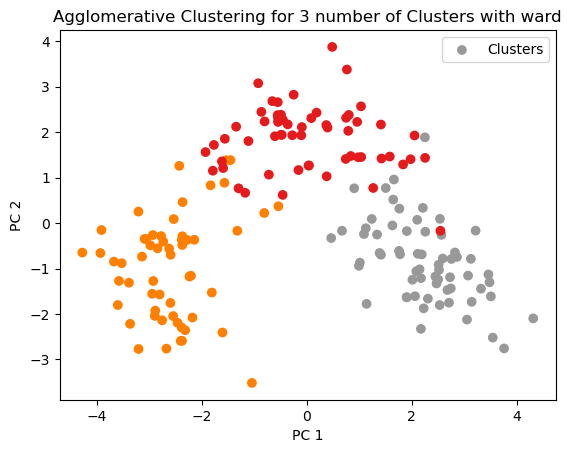

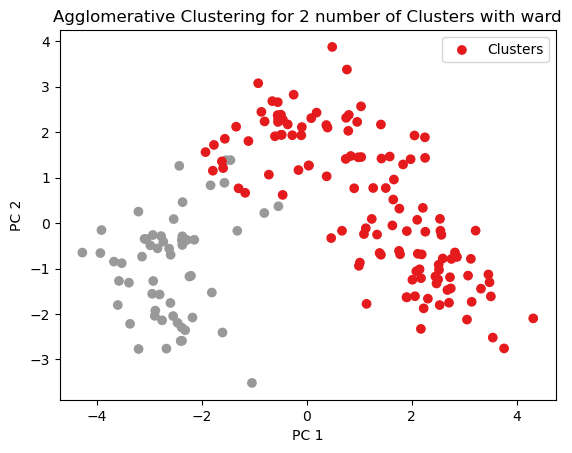

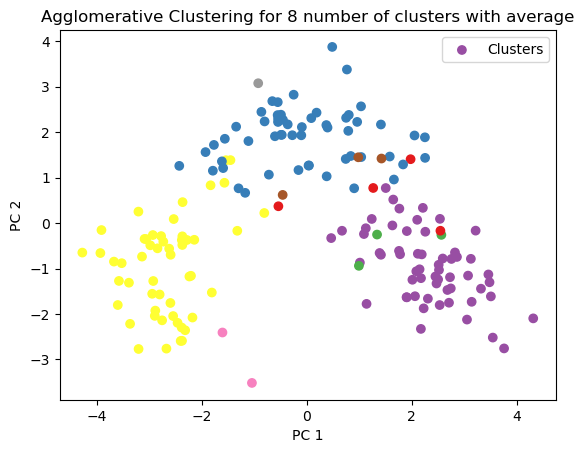

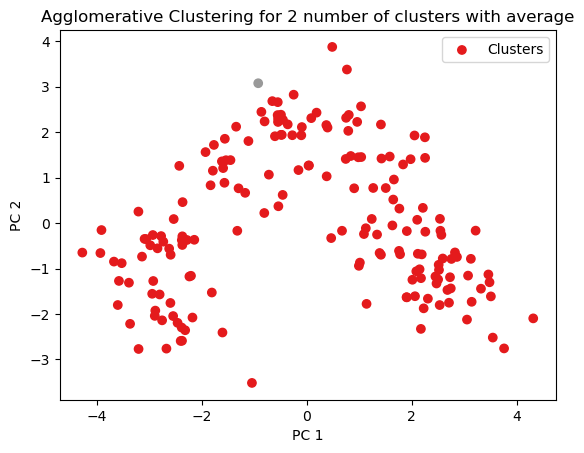

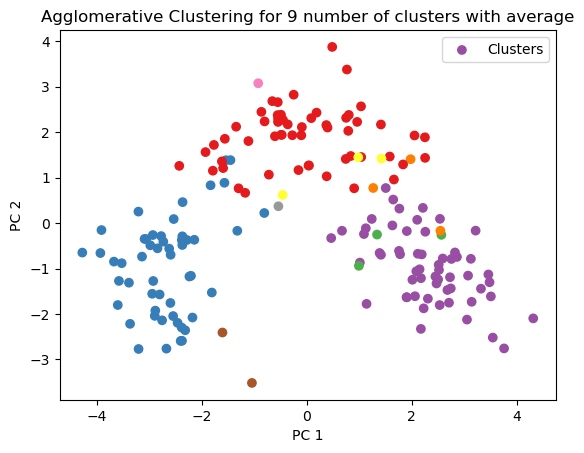

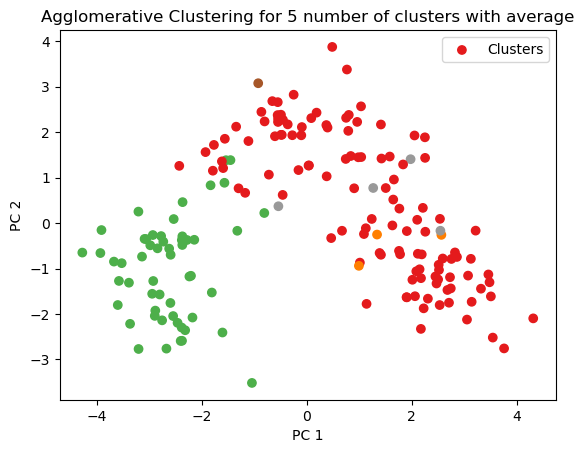

In [5]:
# A list to contain number of clusters that display best result with ward of linkage parameter
clusters_with_ward =[3,2]

# A list to contain number of clusters that display best result with average of linkage parameter
clusters_with_average = [8,2,9,5]

for i in clusters_with_ward:
    # Building the model
    model = AgglomerativeClustering(n_clusters=i, linkage='ward')
    clusters = model.fit_predict(scaled_wine_data)

    # Applying PCA for visualization
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_wine_data)

    # Creating a new DataFrame with the PCA results
    pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

    # Ploting the data points with cluster colors
    plt.figure()
    plt.scatter(pca_df['PC1'], pca_df['PC2'], c=clusters, cmap='Set1', label='Clusters')
    plt.title(f'Agglomerative Clustering for {i} number of Clusters with ward')
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
    plt.show()

for i in clusters_with_average:
    # Building the model
    model = AgglomerativeClustering(n_clusters=i, linkage='average')
    clusters = model.fit_predict(scaled_wine_data)

    # Applying PCA for visualization
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_wine_data)

    # Creating a new DataFrame with the PCA results
    pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

    # Ploting the data points with cluster colors
    plt.figure()
    plt.scatter(pca_df['PC1'], pca_df['PC2'], c=clusters, cmap='Set1', label='Clusters')
    plt.title(f'Agglomerative Clustering for {i} number of clusters with average')
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
    plt.show()

The use of two principal components would be a bad idea, as it could lead to significant loss of information. Also, only two principal components may not be sufficient to represent the clusters accurately. We could have complex and overlapping clusters, since our data is complex and two principal components might not have enough discriminative power to clearly separate different clusters.
The Agglomerative Clustering for 3 number of clusters with ward of linkage parameter looks like my predicted clusters in Part 1. 

### Part 2b: Dendrograms

 - Plot dendrograms to visualize the merging processes.
 - For this you will need a linkage matrix. *Hint: while you can extract one from a fitted AgglomerativeClustering object, it is much easier to use the scipy implementation (`scipy.cluster.hierarchy.linkage`).*
 - Compute the linkage matrix using Ward and Single linkage, and plot the dendrograms using `scipy.cluster.hierarchy.dendrogram`.
 - Truncate the dendrogram for better readability. You may choose how exactly you want to do the truncation.
 - How do you interpret the dendrograms? How do they differ?

*Note: when truncating a dendrogram, a number in parentheses refers to the amount of samples in a subtree. A number without parentheses is the index of a single sample*

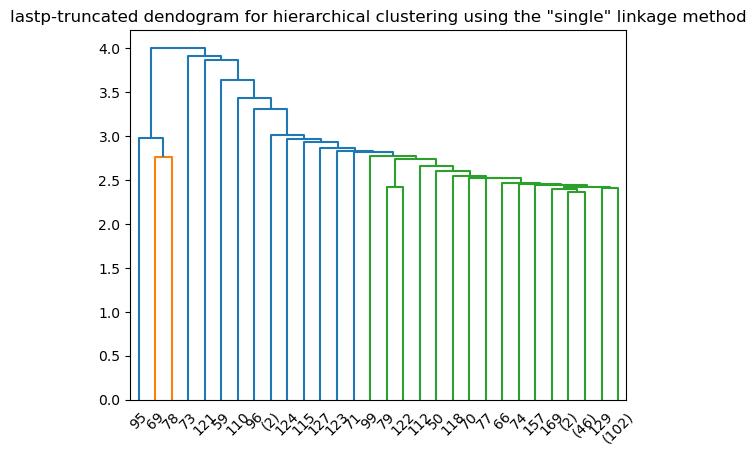

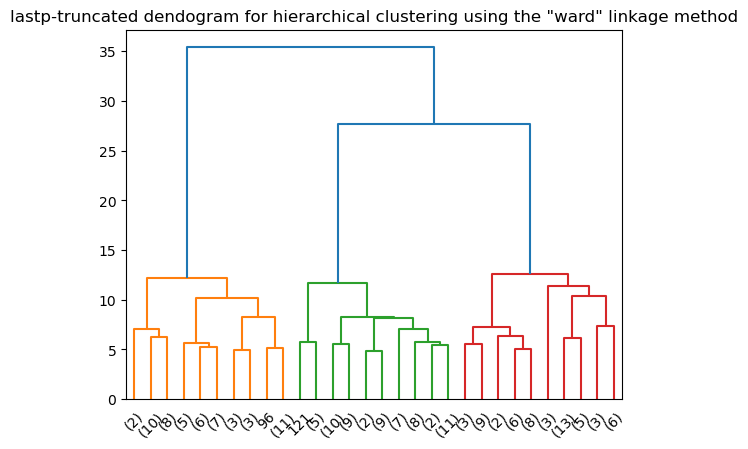

In [6]:
# Importing library
from scipy.cluster import hierarchy

# Performing hierarchical clustering using the 'single' linkage method
Z = hierarchy.linkage(scaled_wine_data, 'single')

# Plotting and displaying 'lastp'-truncated dendogram
plt.figure()
plt.title('lastp-truncated dendogram for hierarchical clustering using the "single" linkage method')
dn = hierarchy.dendrogram(Z, truncate_mode= 'lastp')

# Performing hierarchical clustering using the 'ward' linkage method
Z = hierarchy.linkage(scaled_wine_data, 'ward')

# Plotting and displaying 'lastp'-truncated dendogram
plt.figure()
plt.title('lastp-truncated dendogram for hierarchical clustering using the "ward" linkage method')
dn = hierarchy.dendrogram(Z, truncate_mode= 'lastp')

Two dendograms have significant differences. The first one looks more complicated than the other. First one includes more clades, and the similarity between leaves is much weaker than the similarity identified in the second dendogram. As can be seen from the graphes, the second dendogram is much more successful to clustering the data, since the resulting leaves possess higher degree of similarity than the one in the first dendogram. 

### Part 3: _k_-means clustering

 - Perform _k_-means clustering on the data. Try 2-10 numbers of clusters.
 - Evaluate the clustering performance using silhouette score.
 - Choose the best 3 numbers of clusters according to silhouette score that you discovered above, and once again visualize them on a scatter plot of the first two principal components.
 - Display the centroids of the clusters on the plot. Remember to transform the centroids to the PCA space. Explain why you need to transform the centroids.

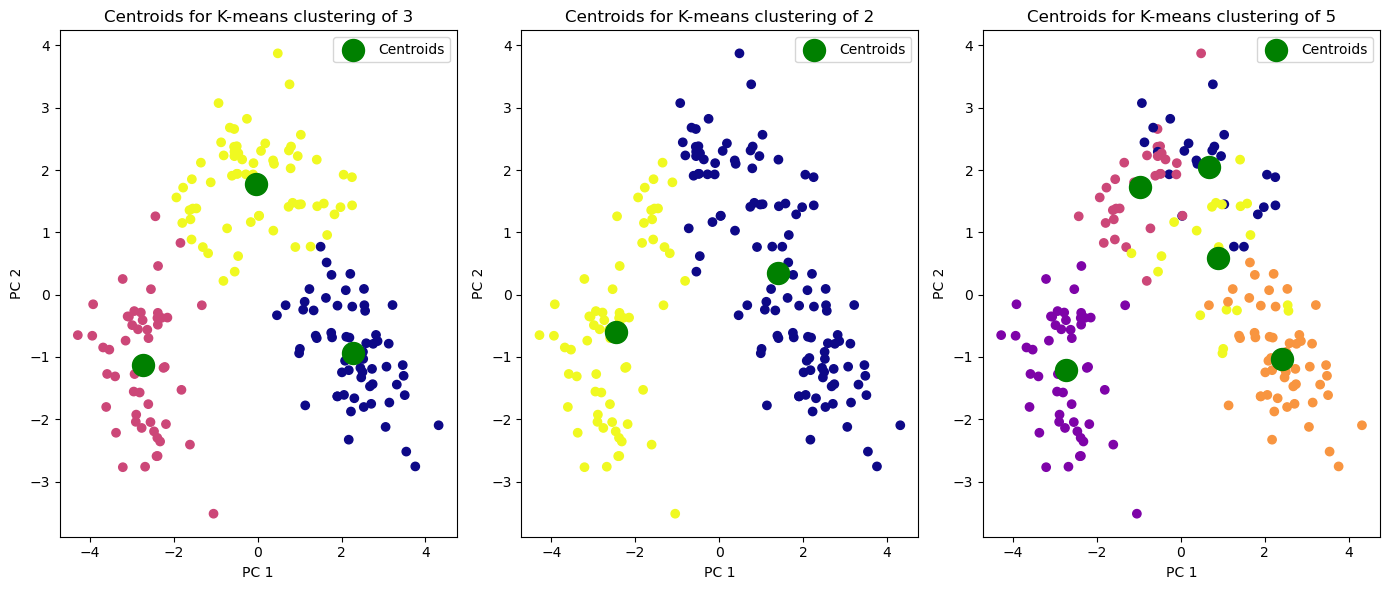

In [13]:
# Defining the number of clusters
n_of_clusters=list(range(2, 11))

# A list to contain the silhoutte scores
s_scores=[]

# Performing the K means clustering and storing silhouette scores corresponding to each number of clusters
for i in range (2,11):
    kmeans=KMeans(n_clusters=i, random_state=2310614, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_wine_data)
    silhouette_avg = silhouette_score(scaled_wine_data, cluster_labels)
    s_scores.append(silhouette_avg)

# Selecting the indexes of the 3 highest silhouette scores
optimal_k_indexes = np.argsort(s_scores)[::-1][:3]

# Selecting the best 3 numbers of clusters according to their silhouette scores
optimal_k_values = [n_of_clusters[i] for i in optimal_k_indexes]

# Visualizing the clustering results of the best 3 numbers of clusters on a scatter plot of first principal compoentns
plt.figure(figsize = (14, 6))

# A loop to iterate over each k-value out of the best 3 k-values
for i, k in enumerate(optimal_k_values, 1):
    
    # Performing k-means clustering
    k_means = KMeans(n_clusters = k, random_state = 2308623, n_init = 10)

    # Fiting the data and storing the labels for different clusters
    cluster_labels = k_means.fit_predict(scaled_wine_data)

    # Creating a PCA model
    pca = PCA(n_components = 2)

    # Transforming the data to the first two principal components
    data_pca = pca.fit_transform(scaled_wine_data)

    # Transform the centroids to the PCA space
    pca_centroids = pca.transform(k_means.cluster_centers_)

    # Creating a subplot for each k-value
    plt.subplot(1, 3, i)

    # Creating a scatter plot of the first two principal components
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c = cluster_labels, cmap = 'plasma')

    # Displaying the centroids
    plt.scatter(pca_centroids[:, 0], pca_centroids[:, 1], marker = 'o', s=250, c = 'green', label = 'Centroids')

    # Title
    plt.title(f'Centroids for K-means of k={k}')

    # The label for the x-axis
    plt.xlabel('PC 1')

    # The label for the y-axis
    plt.ylabel('PC 2')

    # The legend
    plt.legend()

# Setting the layout of the plot
plt.tight_layout()

# Display the results
plt.show()

The centroids are transformed into PCA space, because we have to deal with a large number of features and PCA helps in reducing the dimensionality of our data. It is hard to to visualize clusters in a high-dimensional space, using PCA, we can visualize the clustering in 2D space. Moreover, thanks to the PCA, we can easily interpret and understand the structure of data.

### Part 4 (BONUS): Filling in missing labels using clustering

In this bonus exercise, you're given a dataset with almost all of the labels are missing. This is the starting point in semi-supervised learning. Semi-supervised learning in general is beyond the scope of this course, but if you want you can learn more about it, starting e.g. on [the sklearn page for semi-supervised learning](https://scikit-learn.org/stable/modules/semi_supervised.html). **This exercise does not require researching semi-supervised learning, however.**

The dataset used in this exercise is a slightly modified version of [the seeds dataset](https://archive.ics.uci.edu/dataset/236/seeds). The features are different properties of wheat seeds. They are divided to three different classes, simply called `target1`, `target2` and `target3` here. The feature names and their data types are listed in the table below. **Use the modified dataset on Moodle, with the filename `ex3_seeds_missinglabels.csv`**

| Feature | Type 
| :--- | ---: 
| Area | Numeric (float)
| Perimeter | Numeric (float)
| Compactness | Numeric (float)
| Length | Numeric (float)
| Width | Numeric (float)
| Asymmetry Coefficient | Numeric (float)
| Length Groove | Numeric (float)
| Target | Categorical (nominal)

First, visualize the first two principal components of the dataset in a scatter plot, showing the labels real for data points you were given. Try to see if the labels look like they belong in what look like clusters on the plot.

Your task is to use clustering to assign labels to the rows that have an `unknown` value for their label. Do this by first clustering all of the data, and then filling in the unknown values based on which clusters the data points with known values tend to fit in. The details of how exactly you decide which rows get assigned which label are up to you - you can get creative. Describe and justify your thought process, though.

Use whichever clustering methods you prefer. You can cluster the data into 3 clusters because you have 3 known labels, but you could also try a higher number of clusters that you can then merge.

You are also given the full labels for the dataset in a separate file called `ex3_seeds_labels.csv`. Plot the real labels next to the labels that your clustering attempts predicted.

Finally, compute the adjusted Rand index for labels predicted by your clustering solutions and the real labels, and display it along the scatter plots. Rand index is a measure of similarity between two partitions of a set of elements. Adjusted Rand index is corrected for chance using the maximum and expected values of Rand index. Optionally, you can learn more about the Rand index e.g. on [the Wikipedia page for Rand index](https://en.wikipedia.org/wiki/Rand_index). Here you can simply use the `sklearn.metrics.adjusted_rand_score` method imported at the beginning of this notebook.